<a href="https://colab.research.google.com/github/silverCore97/Bagua/blob/main/Bagua_Example_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!pip install bagua-cuda111

     |████████████████████████████████| 18.8 MB 1.2 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 5.8 MB 48.9 MB/s 
     |████████████████████████████████| 10.9 MB 59.7 MB/s 
     |████████████████████████████████| 212 kB 53.4 MB/s 
     |████████████████████████████████| 100 kB 9.7 MB/s 
     |████████████████████████████████| 95 kB 3.9 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 82 kB 1.2 MB/s 
     |████████████████████████████████| 4.4 MB 53.0 MB/s 
     |████████████████████████████████| 2.5 MB 50.6 MB/s 
     |████████████████████████████████| 96 kB 5.6 MB/s 
     |████████████████████████████████| 224 kB 61.7 MB/s 
     |████████████████████████████████| 132 kB 63.5 MB/s 
     |████████████████████████████████| 251 kB 59.8 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████

In [ ]:
import os
os.environ['RANK'] = '0'
os.environ['WORLD_SIZE'] = '1'
os.environ['MASTER_ADDR'] = 'localhost'
os.environ['MASTER_PORT'] = '29500'

test

nvcc_version:  11.1
Installing nccl 2.10.3 for CUDA 11.1 to: /root/.local/share/bagua/nccl


nccl_2.10.3-1+cuda11.0_x86_64.txz: 138MB [00:03, 43.9MB/s]                           


Extracting...
Installing...
Cleaning up...
Done!



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/gevent/threadpool.py", line 157, in _before_run_task
    _sys.settrace(_get_thread_trace())


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/gevent/threadpool.py", line 162, in _after_run_task
    _sys.settrace(None)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



INFO:root:Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321435
INFO:root:Train Epoch: 1 [640/60000 (1%)]	Loss: 1.669184
INFO:root:Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.806010
INFO:root:Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.565950
INFO:root:Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.629421
INFO:root:Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.320438
INFO:root:Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.475412
INFO:root:Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.313558
INFO:root:Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.260768
INFO:root:Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.169604
INFO:root:Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.444417
INFO:root:Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.244899
INFO:root:Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.124201
INFO:root:Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.206234
INFO:root:Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.342504
INFO:root:Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.372292
INFO:root:Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.240190
INFO:root

[0.04472650604248047, 0.03510569801330567, 0.03405106506347656]
[98.5, 98.8, 98.91]


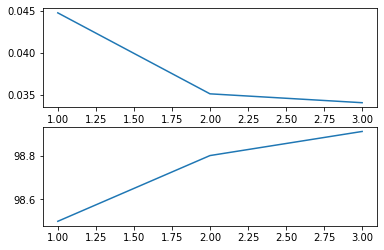

In [ ]:
acc_list=[]
loss_list=[]
from __future__ import print_function
import argparse
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import logging
import bagua.torch_api as bagua
import bagua_core 

bagua_core.install_deps()


# Model for Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

#------Training Model
def train(args, model, train_loader, optimizer, epoch):
    #??????? What does model.train() do exactly?
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #data: features , target: label
        data, target = data.cuda(), target.cuda()
        #??????? Optimizer calculates weights where gradient == 0
        optimizer.zero_grad()
        # Calculates predicted labels by using the model
        output = model(data)
        # Loss function using predicted labels and actual labels
        loss = F.nll_loss(output, target)
        # Backwards propagation    !!!calculates tensor loss gradient 
        loss.backward()
        # Optimizer step selection
        if args.fuse_optimizer:
            optimizer.fuse_step()
        else:
            optimizer.step()
        if batch_idx % args.log_interval == 0:
            logging.info(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cuda(), target.cuda()
            output = model(data)
            test_loss += F.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    logging.info(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )
    return test_loss,correct


def main():
    # Training settings
    parser = argparse.ArgumentParser(description="PyTorch MNIST Example")
    parser.add_argument(
        "--batch-size",
        type=int,
        default=64,
        metavar="N",
        help="input batch size for training (default: 64)",
    )
    parser.add_argument(
        "--test-batch-size",
        type=int,
        default=1000,
        metavar="N",
        help="input batch size for testing (default: 1000)",
    )

    #Set default to 3 instead of 14
    parser.add_argument(
        "--epochs",
        type=int,
        default=3,
        metavar="N",
        help="number of epochs to train (default: 14)",
    )
    parser.add_argument(
        "--lr",
        type=float,
        default=1.0,
        metavar="LR",
        help="learning rate (default: 1.0)",
    )
    parser.add_argument(
        "--gamma",
        type=float,
        default=0.7,
        metavar="M",
        help="Learning rate step gamma (default: 0.7)",
    )
    parser.add_argument(
        "--log-interval",
        type=int,
        default=10,
        metavar="N",
        help="how many batches to wait before logging training status",
    )
    parser.add_argument(
        "--save-model",
        action="store_true",
        default=False,
        help="For Saving the current Model",
    )

    parser.add_argument(
        "--algorithm",
        type=str,
        default="gradient_allreduce",
        help="gradient_allreduce, bytegrad, decentralized, low_precision_decentralized, qadam, async",
        #Add new algorithm for testing------------------
    )



    parser.add_argument(
        "--async-sync-interval",
        default=500,
        type=int,
        help="Model synchronization interval(ms) for async algorithm",
    )
    parser.add_argument(
        "--set-deterministic",
        action="store_true",
        default=False,
        help="set deterministic or not",
    )
    parser.add_argument(
        "--fuse-optimizer",
        action="store_true",
        default=False,
        help="fuse optimizer or not",
    )

    #args = parser.parse_args() 
    # New line below solves ipykernel_launcher.py: error: unrecognized arguments
    args, unknown = parser.parse_known_args()
    
    if args.set_deterministic:
        print("set_deterministic: True")
        np.random.seed(666)
        random.seed(666)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        torch.manual_seed(666)
        torch.cuda.manual_seed_all(666 + int(bagua.get_rank()))
        torch.set_printoptions(precision=10)

    torch.cuda.set_device(bagua.get_local_rank())
    bagua.init_process_group()



    logging.basicConfig(format="%(levelname)s:%(message)s", level=logging.ERROR)
    if bagua.get_rank() == 0:
        logging.getLogger().setLevel(logging.INFO)

    train_kwargs = {"batch_size": args.batch_size}
    test_kwargs = {"batch_size": args.test_batch_size}
    cuda_kwargs = {"num_workers": 1, "pin_memory": True, "shuffle": True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )

    if bagua.get_local_rank() == 0:
        dataset1 = datasets.MNIST(
            "../data", train=True, download=True, transform=transform
        )
        torch.distributed.barrier()
    else:
        torch.distributed.barrier()
        dataset1 = datasets.MNIST(
            "../data", train=True, download=True, transform=transform
        )

    dataset2 = datasets.MNIST("../data", train=False, transform=transform)
    train_sampler = torch.utils.data.distributed.DistributedSampler(
        dataset1, num_replicas=bagua.get_world_size(), rank=bagua.get_rank()
    )
    train_kwargs.update(
        {
            "sampler": train_sampler,
            "batch_size": args.batch_size // bagua.get_world_size(),
            "shuffle": False,
        }
    )
    # Train and Test dataset
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    # ??????????
    model = Net().cuda()
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)


    if args.algorithm == "gradient_allreduce":
        from bagua.torch_api.algorithms import gradient_allreduce

        algorithm = gradient_allreduce.GradientAllReduceAlgorithm()
    elif args.algorithm == "decentralized":
        from bagua.torch_api.algorithms import decentralized

        algorithm = decentralized.DecentralizedAlgorithm()
    elif args.algorithm == "low_precision_decentralized":
        from bagua.torch_api.algorithms import decentralized

        algorithm = decentralized.LowPrecisionDecentralizedAlgorithm()
    elif args.algorithm == "bytegrad":
        from bagua.torch_api.algorithms import bytegrad

        algorithm = bytegrad.ByteGradAlgorithm()
    elif args.algorithm == "qadam":
        from bagua.torch_api.algorithms import q_adam

        optimizer = q_adam.QAdamOptimizer(
            model.parameters(), lr=args.lr, warmup_steps=100
        )
        algorithm = q_adam.QAdamAlgorithm(optimizer)
    elif args.algorithm == "async":
        from bagua.torch_api.algorithms import async_model_average

        algorithm = async_model_average.AsyncModelAverageAlgorithm(
            sync_interval_ms=args.async_sync_interval,
        )
    else:
        raise NotImplementedError

    #  Model von Bagua
    model = model.with_bagua(
        [optimizer],
        algorithm,
        do_flatten=not args.fuse_optimizer,
    )

    # Optimizer from Bagua if args.fuse_optimizer==True
    if args.fuse_optimizer:
        optimizer = bagua.contrib.fuse_optimizer(optimizer)

    #------------ Loss, accuracy
    loss_list =[]
    acc_list = []

    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, args.epochs + 1):
        if args.algorithm == "async":
            model.bagua_algorithm.resume(model)

        train(args, model, train_loader, optimizer, epoch)

        if args.algorithm == "async":
            model.bagua_algorithm.abort(model)

        new_loss,new_acc =test(model, test_loader)
        loss_list.append(new_loss)
        acc_list.append(new_acc/100.0)
        scheduler.step()

    if args.save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")

    import matplotlib.pyplot as plt

    ep =[]


    for i in range(1, args.epochs + 1):
      ep.append(i)

    print(loss_list)
    print(acc_list)
    
     

    plt.figure(1)
    plt.subplot(211)
    plt.plot(ep,loss_list)
    plt.subplot(212)
    plt.plot(ep,acc_list)

    plt.show()  
    


if __name__ == "__main__":
    main()

In [ ]:
print(acc_list)

[]


In [ ]:
import matplotlib.pyplot as plt

ep =[]


for i in range(1, 3 + 1):
ep.append(i)


plt.plot(ep,loss_list)
plt.plot(ep,acc_list)
plt.show()  

IndentationError: ignored

For algorithm change, switch default variable here.

In [ ]:
    parser.add_argument(
        "--algorithm",
        type=str,
        default="gradient_allreduce",
        help="gradient_allreduce, bytegrad, decentralized, low_precision_decentralized, qadam, async",
        #Add new algorithm for testing------------------
    )



In [ ]:


    parser.add_argument(
        "--async-sync-interval",
        default=500,
        type=int,
        help="Model synchronization interval(ms) for async algorithm",
    )
    parser.add_argument(
        "--set-deterministic",
        action="store_true",
        default=False,
        help="set deterministic or not",
    )
    parser.add_argument(
        "--fuse-optimizer",
        action="store_true",
        default=False,
        help="fuse optimizer or not",
    )

    #args = parser.parse_args() 
    # New line below solves ipykernel_launcher.py: error: unrecognized arguments
    args, unknown = parser.parse_known_args()
    
    if args.set_deterministic:
        print("set_deterministic: True")
        np.random.seed(666)
        random.seed(666)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        torch.manual_seed(666)
        torch.cuda.manual_seed_all(666 + int(bagua.get_rank()))
        torch.set_printoptions(precision=10)

    torch.cuda.set_device(bagua.get_local_rank())
    bagua.init_process_group()



    logging.basicConfig(format="%(levelname)s:%(message)s", level=logging.ERROR)
    if bagua.get_rank() == 0:
        logging.getLogger().setLevel(logging.INFO)

    train_kwargs = {"batch_size": args.batch_size}
    test_kwargs = {"batch_size": args.test_batch_size}
    cuda_kwargs = {"num_workers": 1, "pin_memory": True, "shuffle": True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )

    if bagua.get_local_rank() == 0:
        dataset1 = datasets.MNIST(
            "../data", train=True, download=True, transform=transform
        )
        torch.distributed.barrier()
    else:
        torch.distributed.barrier()
        dataset1 = datasets.MNIST(
            "../data", train=True, download=True, transform=transform
        )

    dataset2 = datasets.MNIST("../data", train=False, transform=transform)
    train_sampler = torch.utils.data.distributed.DistributedSampler(
        dataset1, num_replicas=bagua.get_world_size(), rank=bagua.get_rank()
    )
    train_kwargs.update(
        {
            "sampler": train_sampler,
            "batch_size": args.batch_size // bagua.get_world_size(),
            "shuffle": False,
        }
    )
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().cuda()
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)


Import and use the algorithm here

Algorithm for gradient allreduce

```
#!/usr/bin/env python3

from bagua.torch_api.bucket import BaguaBucket
from bagua.torch_api.data_parallel.bagua_distributed import BaguaDistributedDataParallel
from bagua.torch_api.algorithms.base import Algorithm, AlgorithmImpl
from bagua.torch_api.communication import BaguaProcessGroup


class GradientAllReduceAlgorithmImpl(AlgorithmImpl):
    def __init__(
        self,
        process_group: BaguaProcessGroup,
        hierarchical: bool = False,
        average: bool = True,
    ):

    EXPLANATION of the usage
        """
        Implementation of the
        `GradientAllReduce <https://tutorials.baguasys.com/algorithms/gradient-allreduce>`_
        algorithm.
        Args:
            process_group (BaguaProcessGroup): The process group to work on.
            hierarchical (bool): Enable hierarchical communication.
            average (bool): If ``True``, the gradients on each worker are averaged.
                Otherwise, they are summed.
        """ 
        super(GradientAllReduceAlgorithmImpl, self).__init__(process_group)
        self.hierarchical = hierarchical
        self.average = average

    def init_operations(
        self,
        _: BaguaDistributedDataParallel,
        bucket: BaguaBucket,
    ):
        bucket.clear_ops()



   (1) Compute the gradient using a minibatch.
   (2) Compute the mean of the gradients on all     workers by using the AllReduce collective.
   (3)Update the model with the averaged gradient.

   

        bucket.append_centralized_synchronous_op(
            hierarchical=self.hierarchical,
            average=self.average,
            group=self.process_group,
        )


class GradientAllReduceAlgorithm(Algorithm):
    def __init__(self, hierarchical: bool = False, average: bool = True):
        """
        Create an instance of the
        `GradientAllReduce <https://tutorials.baguasys.com/algorithms/gradient-allreduce>`_
        algorithm.
        Args:
            hierarchical (bool): Enable hierarchical communication.
            average (bool): If ``True``, the gradients on each worker are averaged.
                Otherwise, they are summed.
        """
        self.hierarchical = hierarchical
        self.average = average

    def reify(self, process_group: BaguaProcessGroup) -> GradientAllReduceAlgorithmImpl:
        return GradientAllReduceAlgorithmImpl(
            process_group,
            hierarchical=self.hierarchical,
            average=self.average,
        )
```



In [ ]:

    if args.algorithm == "gradient_allreduce":
        from bagua.torch_api.algorithms import gradient_allreduce

        algorithm = gradient_allreduce.GradientAllReduceAlgorithm()
    elif args.algorithm == "decentralized":
        from bagua.torch_api.algorithms import decentralized

        algorithm = decentralized.DecentralizedAlgorithm()
    elif args.algorithm == "low_precision_decentralized":
        from bagua.torch_api.algorithms import decentralized

        algorithm = decentralized.LowPrecisionDecentralizedAlgorithm()
    elif args.algorithm == "bytegrad":
        from bagua.torch_api.algorithms import bytegrad

        algorithm = bytegrad.ByteGradAlgorithm()
    elif args.algorithm == "qadam":
        from bagua.torch_api.algorithms import q_adam

        optimizer = q_adam.QAdamOptimizer(
            model.parameters(), lr=args.lr, warmup_steps=100
        )
        algorithm = q_adam.QAdamAlgorithm(optimizer)
    elif args.algorithm == "async":
        from bagua.torch_api.algorithms import async_model_average

        algorithm = async_model_average.AsyncModelAverageAlgorithm(
            sync_interval_ms=args.async_sync_interval,
        )
    else:
        raise NotImplementedError

    model = model.with_bagua(
        [optimizer],
        algorithm,
        do_flatten=not args.fuse_optimizer,
    )

    if args.fuse_optimizer:
        optimizer = bagua.contrib.fuse_optimizer(optimizer)

    #------------ Loss, accuracy
    acc = []

    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, args.epochs + 1):
        if args.algorithm == "async":
            model.bagua_algorithm.resume(model)

        train(args, model, train_loader, optimizer, epoch)

        if args.algorithm == "async":
            model.bagua_algorithm.abort(model)

        acc.append(test(model, test_loader))
        scheduler.step()

    if args.save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")

    import matplotlib.pyplot as plt

    ep =[]
    loss =[]
    accu =[]

    for i in range(1, args.epochs + 1):
      ep.append(i)
      loss.append(acc[i][0])
      accu.append(acc[i][1])

      plt.plot(ep,loss)
      plt.plot(ep,accu)
      plt.show()   

    


if __name__ == "__main__":
    main()

In [ ]:
%tb